In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

#from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
#import joblib
#from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import KFold
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

In [2]:
pathBase = 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//'
#pathBase = 'E://Chuan//Documents//Database//DICOM//CoroBase//Arrangement//'

theWhole = {}
# theWhole is dictionary containing views (keys) which the values are DICOM files

f = []
f_LCA_Caudal = []
mypath_LCA_Caudal = pathBase + 'LCA_Caudal'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Caudal):
    f.extend(filenames)
for l in f:
    f_LCA_Caudal.append(mypath_LCA_Caudal + '\\' + l) 
    
f = []
f_LCA_Cranial = []
mypath_LCA_Cranial = pathBase + 'LCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial.append(mypath_LCA_Cranial + '\\' + l) 
    
f = []
f_LCA_Cranial_LAO = []
mypath_LCA_Cranial_LAO = pathBase + 'LCA_Cranial_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_LAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_LAO.append(mypath_LCA_Cranial_LAO + '\\' + l) 
    
    
f = []
f_LCA_Cranial_RAO = []
mypath_LCA_Cranial_RAO = pathBase + 'LCA_Cranial_RAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_RAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_RAO.append(mypath_LCA_Cranial_RAO + '\\' + l) 
    
f = []
f_LCA_Spider = []
mypath_LCA_Spider = pathBase + 'LCA_Spider'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Spider):
    f.extend(filenames)
for l in f:
    f_LCA_Spider.append(mypath_LCA_Spider + '\\' + l) 
    
f = []
f_RCA_Cranial = []
mypath_RCA_Cranial = pathBase + 'RCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_Cranial):
    f.extend(filenames)
for l in f:
    f_RCA_Cranial.append(mypath_RCA_Cranial + '\\' + l) 
    
f = []
f_RCA_LAO = []
mypath_RCA_LAO = pathBase + 'RCA_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_LAO):
    f.extend(filenames)
for l in f:
    f_RCA_LAO.append(mypath_RCA_LAO + '\\' + l) 
    

theWhole['LCA_Caudal'] = f_LCA_Caudal
theWhole['LCA_Cranial'] = f_LCA_Cranial
theWhole['LCA_Cranial_LAO'] = f_LCA_Cranial_LAO
theWhole['LCA_Cranial_RAO'] = f_LCA_Cranial_RAO
theWhole['LCA_Spider'] = f_LCA_Spider
theWhole['RCA_Cranial'] = f_RCA_Cranial
theWhole['RCA_LAO'] = f_RCA_LAO

In [3]:
viewConvert = {'LCA_Caudal': 0, 
               'LCA_Cranial': 1,
               'LCA_Cranial_LAO': 2,
               'LCA_Cranial_RAO': 3,
               'LCA_Spider': 4,
               'RCA_Cranial': 5,
               'RCA_LAO': 6}

In [4]:
theWhole['LCA_Cranial_LAO']

['I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\04A303A242F04B35BC889915B414E048.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\04A303A242F04B35BC889915B414E048.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\07FFCD52CE914F29B7E4BC877FDE039C.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\07FFCD52CE914F29B7E4BC877FDE039C.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\082257329B3A4223B258DCBAB5C11DEA.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\082257329B3A4223B258DCBAB5C11DEA.dcm_average.npy',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_LAO\\0AFD257E3761428881D7A2FFAC11F8D3.avi',
 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//LCA_Cranial_

In [5]:
start = time.time()

array = {}
i = 0

for view in theWhole.keys():
    array[view] = []
    for case in theWhole[view]:
        if case.split('.')[-1] == 'npy':
            arr = np.load(case)
            array[view].append(arr)

end = time.time()
print(end - start)

1.2915446758270264


### 2D to 1D

In [6]:
array_flat = {}

for view in array.keys():
    array_flat[view] = []
    for case in array[view]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        array_flat[view].append(case_flat)

## Neural Network

In [7]:
x_sample_list = []
y_sample_list = []

for y, x in array_flat.items():    
    for x_item in x:
        x_sample_list.append(x_item)
        y_sample_list.append(y)

In [8]:
len(x_sample_list)

954

In [9]:
len(x_sample_list[0])

262144

In [10]:
512*512

262144

In [11]:
len(y_sample_list)

954

In [12]:
y_sample_list

['LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caudal',
 'LCA_Caud

In [13]:
y_sample_digital_list = []
for item in y_sample_list:
    y_sample_digital_list.append(viewConvert[item])

### Model

In [14]:
model = Sequential()
model.add(Dense(800, activation='relu', kernel_initializer='he_normal', input_shape=(262144, )))
model.add(Dense(400, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(80, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(7, activation='softmax'))

#### Tensorboard Initilization

In [15]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the model

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training

In [ ]:
start = time.time()

X_train = np.array(x_sample_list)
y_train = np.array(y_sample_digital_list)

model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, callbacks=[tensorboard_callback])

end = time.time()

Epoch 1/500
 1/15 [=>............................] - ETA: 0s - loss: 376.7146 - accuracy: 0.1719WARNING:tensorflow:From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
15/15 [==============================] - 24s 2s/step - loss: 32904.3398 - accuracy: 0.1562
Epoch 2/500
15/15 [==============================] - 23s 2s/step - loss: 24511.1738 - accuracy: 0.1698
Epoch 3/500
15/15 [==============================] - 23s 2s/step - loss: 13390.5322 - accuracy: 0.1468
Epoch 4/500
15/15 [==============================] - 23s 2s/step - loss: 4842.0098 - accuracy: 0.1520
Epoch 5/500
15/15 [==============================] - 23s 2s/step - loss: 3254.6321 - accuracy: 0.1562
Epoch 6/500
15/15 [==============================] - 23s 2s/step - loss: 2363.5007 - accuracy: 0.1929
Epoch 7/500
15/15 [============

15/15 [==============================] - 25s 2s/step - loss: 13.1949 - accuracy: 0.8239
Epoch 159/500
15/15 [==============================] - 24s 2s/step - loss: 13.1181 - accuracy: 0.8249
Epoch 160/500
15/15 [==============================] - 24s 2s/step - loss: 8.9423 - accuracy: 0.8501
Epoch 161/500
15/15 [==============================] - 24s 2s/step - loss: 7.1093 - accuracy: 0.8658
Epoch 162/500
15/15 [==============================] - 24s 2s/step - loss: 7.5724 - accuracy: 0.8543
Epoch 163/500
15/15 [==============================] - 24s 2s/step - loss: 8.9982 - accuracy: 0.8344
Epoch 164/500
15/15 [==============================] - 24s 2s/step - loss: 9.7436 - accuracy: 0.8040
Epoch 165/500
15/15 [==============================] - 24s 2s/step - loss: 8.5331 - accuracy: 0.8428
Epoch 166/500
15/15 [==============================] - 24s 2s/step - loss: 5.3803 - accuracy: 0.8931
Epoch 167/500
15/15 [==============================] - 25s 2s/step - loss: 5.1642 - accuracy: 0.8836
Ep

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               209716000 
_________________________________________________________________
dense_7 (Dense)              (None, 200)               160200    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 217       
Total params: 209,907,027
Trainable params: 209,907,027
Non-trainable params: 0
________________________________________

In [22]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 22004), started 19:12:29 ago. (Use '!kill 22004' to kill it.)

In [23]:
print(end - start)

9037.644499540329


In [25]:
9037.644499540329/3600

2.5104568054278693

### Save the entire model

In [26]:
model.save('coroLearning_NeralNetwork1') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: coroLearning_NeralNetwork1\assets


### Load the saved model

In [22]:
new_model = keras.models.load_model('coroLearning_NeralNetwork')

In [23]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               209716000 
_________________________________________________________________
dense_1 (Dense)              (None, 200)               160200    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 217       
Total params: 209,907,027
Trainable params: 209,907,027
Non-trainable params: 0
__________________________________________

### Prediction

In [27]:
pathBase = 'I://Chuan//Documents//MyData//ProjNormalCAG//CoroBase//Arrangement//test//'
#pathBase = 'I://Chuan//Documents//MyData//NormalCAG//CoroBase//Arrangement//test//'
#pathBase = 'E://Chuan//Documents//Database//DICOM//CoroBase//Arrangement//test//'

theWhole = {}

f = []
f_LCA_Caudal = []
mypath_LCA_Caudal = pathBase + 'LCA_Caudal'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Caudal):
    f.extend(filenames)
for l in f:
    f_LCA_Caudal.append(mypath_LCA_Caudal + '\\' + l) 
    
f = []
f_LCA_Cranial = []
mypath_LCA_Cranial = pathBase + 'LCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial.append(mypath_LCA_Cranial + '\\' + l) 
    
f = []
f_LCA_Cranial_LAO = []
mypath_LCA_Cranial_LAO = pathBase + 'LCA_Cranial_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_LAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_LAO.append(mypath_LCA_Cranial_LAO + '\\' + l) 
    
    
f = []
f_LCA_Cranial_RAO = []
mypath_LCA_Cranial_RAO = pathBase + 'LCA_Cranial_RAO'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Cranial_RAO):
    f.extend(filenames)
for l in f:
    f_LCA_Cranial_RAO.append(mypath_LCA_Cranial_RAO + '\\' + l) 
    
f = []
f_LCA_Spider = []
mypath_LCA_Spider = pathBase + 'LCA_Spider'
for (dirpath, dirnames, filenames) in walk(mypath_LCA_Spider):
    f.extend(filenames)
for l in f:
    f_LCA_Spider.append(mypath_LCA_Spider + '\\' + l) 
    
f = []
f_RCA_Cranial = []
mypath_RCA_Cranial = pathBase + 'RCA_Cranial'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_Cranial):
    f.extend(filenames)
for l in f:
    f_RCA_Cranial.append(mypath_RCA_Cranial + '\\' + l) 
    
f = []
f_RCA_LAO = []
mypath_RCA_LAO = pathBase + 'RCA_LAO'
for (dirpath, dirnames, filenames) in walk(mypath_RCA_LAO):
    f.extend(filenames)
for l in f:
    f_RCA_LAO.append(mypath_RCA_LAO + '\\' + l) 
    

theWhole['LCA_Caudal'] = f_LCA_Caudal
theWhole['LCA_Cranial'] = f_LCA_Cranial
theWhole['LCA_Cranial_LAO'] = f_LCA_Cranial_LAO
theWhole['LCA_Cranial_RAO'] = f_LCA_Cranial_RAO
theWhole['LCA_Spider'] = f_LCA_Spider
theWhole['RCA_Cranial'] = f_RCA_Cranial
theWhole['RCA_LAO'] = f_RCA_LAO

In [28]:
start = time.time()

array = {}
i = 0

for view in theWhole.keys():
    array[view] = []
    for case in theWhole[view]:
        if case.split('.')[-1] == 'npy':
            arr = np.load(case)
            array[view].append(arr)

end = time.time()
print(end - start)

1.7464900016784668


### 2D to 1D

In [29]:
array_flat = {}

for view in array.keys():
    array_flat[view] = []
    for case in array[view]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        array_flat[view].append(case_flat)

In [30]:
x_test_list = []
y_test_list = []

for y, x in array_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

In [31]:
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(viewConvert[item])

In [32]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

## Performance Measures

In [33]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.857


In [40]:
y_predict = model.predict(X_test)

In [41]:
y_predict

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2955071e-25,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.4987858e-29,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0

In [37]:
len(y_predict)

70

In [48]:
y_predict_filtered = []
for sample in y_predict:
    for i in range(7):
        if sample[i] > 0.5:
            y_predict_filtered.append(i)        

In [49]:
y_predict_filtered

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [36]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6])

In [38]:
len(y_test)

70

### Confusion Matrix (混淆矩阵)

In [54]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6]))
confusion = pd.DataFrame(cm, index=[0, 1, 2, 3, 4, 5, 6],
                        columns=[0, 1, 2, 3, 4, 5, 6])
confusion.to_csv('ConfusionMatrix_NN.csv')
confusion

,0,1,2,3,4,5,6
0,9,0,0,1,0,0,0
1,0,7,2,1,0,0,0
2,0,5,5,0,0,0,0
3,0,0,0,10,0,0,0
4,0,0,0,0,10,0,0
5,0,1,0,0,0,9,0
6,0,0,0,0,0,0,10


In [55]:
print(classification_report(y_test, y_predict_filtered))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.54      0.70      0.61        10
           2       0.71      0.50      0.59        10
           3       0.83      1.00      0.91        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00        10

   micro avg       0.86      0.86      0.86        70
   macro avg       0.87      0.86      0.86        70
weighted avg       0.87      0.86      0.86        70



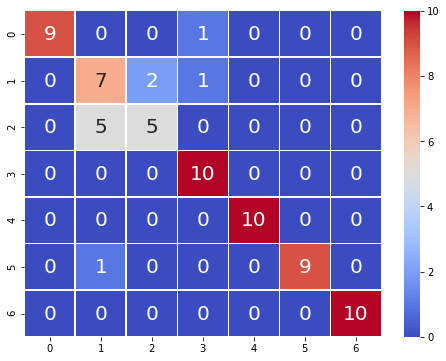

In [56]:
plt.figure(figsize=(8, 6))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

In [57]:
heat_map.figure.savefig("Heatmap_SVM.png", dpi=400)